## Zadanie 3
W zadaniu 3 za zadanie mamy porównać metody symulacji monte carlo bez redukcji wariancji oraz z metodą odbić lustrzanych i z metodą zmiennej kontrolnej
$$
\int_{0}^{1} \frac{4}{1+x^2} \, dx = 4 \int_{0}^{1} \frac{1}{1+x^2} \, dx = 4 \left[ \arctan(x) \right]_{0}^{1} = 4 \left( \arctan(1) - \arctan(0) \right) = 4 \left( \frac{\pi}{4} - 0 \right) = \pi
$$

In [1]:
import numpy as np


def monte_carlo_integration(f: callable, a: float, b: float, N: int) -> float:
    """
    Funkcja szacuje całkę metodą Monte Carlo.

    Parametry:
    f (callable): Funkcja, którą mamy całkować.
    a (float): Dolna granica całkowania.
    b (float): Górna granica całkowania.
    N (int): Liczba losowych punktów.

    Zwraca:
    float: Przybliżona wartość całki.
    """
    sum_f = 0
    x = np.random.uniform(a, b, N)
    sum_f += f(x)
    return (b - a) * np.mean(sum_f)


def f(x: np.ndarray) -> np.ndarray:
    """
    Funkcja zwraca wartość funkcji 4 / (1 + x**2).

    Parametry:
    x (np.ndarray): Tablica wartości, dla których liczymy wartość funkcji.

    Zwraca:
    np.ndarray: Tablica wartości funkcji 4 / (1 + x**2).
    """
    return 4 / (1 + x**2)


# Definiowanie przedziału całkowania
a = 0
b = 1
# Liczba losowych punktów
N = 1000000

# Obliczanie wartości całki metodą Monte Carlo
integral_value = monte_carlo_integration(f, a, b, N)
print(f"Przybliżona wartość całki: {integral_value}")

Przybliżona wartość całki: 3.141580715419294


Metoda zmiennych kontrolnych:
Pierwszą metodą redukcji wariancji jest metoda zmiennych kontorlnych. Polega ona na wprowadzeniu nowej funkcji g(x), której wartość całki znamy  oraz jest skorelowana z funckją f(x), której wartość całki chcemy wyestymować. Nasz estymator wygląda wtedy tak:
$$
I = {I}_f + c({I}_g-K),
$$

${I}_f$ to estymacja f(x),
${I}_g$ to estymacja g(x),
K to wartość g(x),

$$
c = -\frac{\text{Cov}(f(x), g(x))}{\text{Var}(g(x))}.
$$

Metoda odbić lustrzanych: Drugą metodą jest metoda odbić lustrzanych. Polega na najpierw generowaniu N/2 próbek losowych z rozkładu jednostajnego z przedziału (a,b). Następnie tworzymy próbki lustrzane 
$$
X_{mirror} = b - (x-a) 
$$ 
Ten sposób zapewnia symetryczne odbicie względem środka przedziału [a,b]. Później obliczana jest wartość funckji oryginalnych i lustrzanych próbek. Na koniec całkę szacujemy jako średnią wartość funkcji dla obu zestawów próbek przemnożoną przez (b-a)

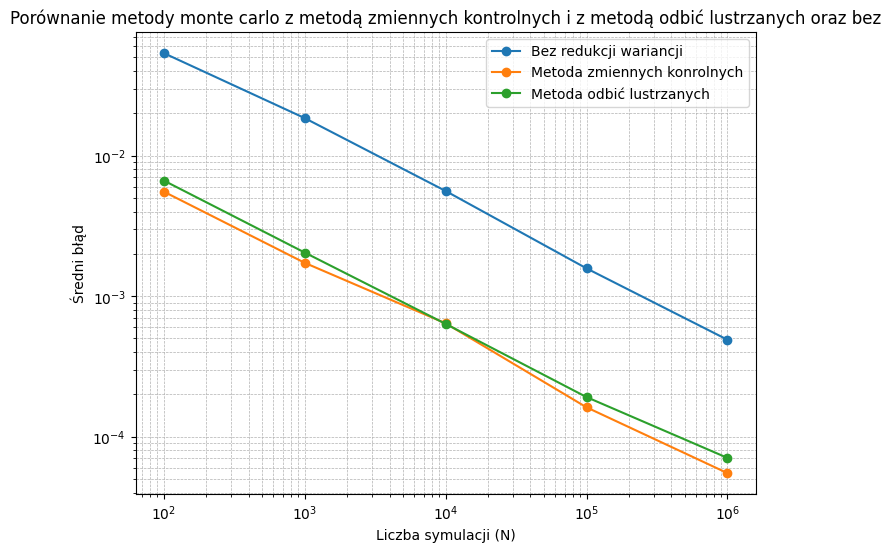

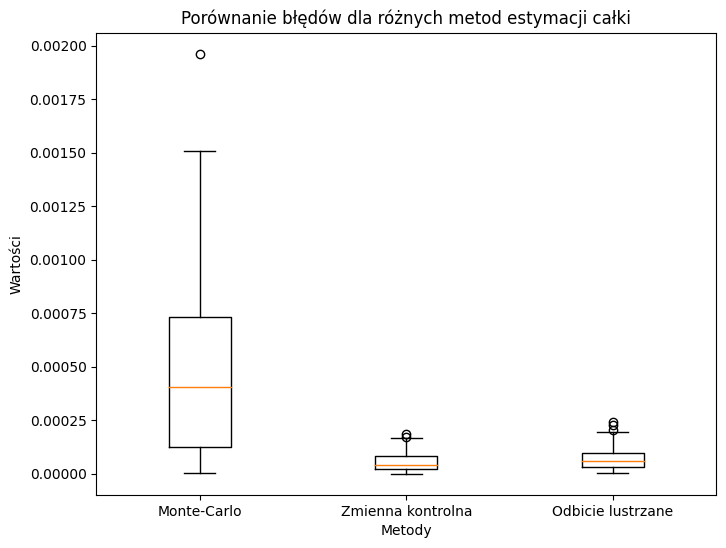

In [20]:
import random
import numpy as np
import matplotlib.pyplot as plt


def monte_carlo_integration(f, a, b, N):
    x = np.random.uniform(a, b, N)
    return (b - a) * np.mean(f(x))


import numpy as np


def monte_carlo_integration_control_variate(
    f: callable, g: callable, a: float, b: float, n_samples: int
) -> float:
    """
    Funkcja szacuje całkę metodą Monte Carlo z kontrolną zmienną.

    Parametry:
    f (callable): Funkcja, którą mamy całkować.
    g (callable): Funkcja pomocnicza (kontrolna zmienna).
    a (float): Dolna granica całkowania.
    b (float): Górna granica całkowania.
    n_samples (int): Liczba losowych próbek.

    Zwraca:
    float: Przybliżona wartość całki.
    """
    samples = np.random.uniform(a, b, n_samples)
    f_values = f(samples)
    g_values = g(samples)

    cov_fg = np.cov(f_values, g_values)[0, 1]
    var_g = np.var(g_values)

    c = -cov_fg / var_g
    control = np.mean(f_values) + c * (np.mean(g_values) - 3 / 2)
    return control


def monte_carlo_integration_antithetic(
    f: callable, a: float, b: float, N: int
) -> float:
    """
    Funkcja szacuje całkę metodą Monte Carlo z użyciem metody odbić lustrzanych.

    Parametry:
    f (callable): Funkcja, którą mamy całkować.
    a (float): Dolna granica całkowania.
    b (float): Górna granica całkowania.
    N (int): Liczba losowych próbek.

    Zwraca:
    float: Przybliżona wartość całki.
    """
    x = np.random.uniform(a, b, N // 2)
    x_mirror = b - (x - a)
    fx = f(x)
    fx_mirror = f(x_mirror)
    return (b - a) * np.mean((fx + fx_mirror) / 2)


def f(x: np.ndarray) -> np.ndarray:
    """
    Funkcja, którą mamy scałkować

    Parametry:
    x (np.ndarray): Tablica wartości, dla których liczymy wartość funkcji.

    Zwraca:
    np.ndarray: Tablica wartości funkcji 4 / (1 + x**2).
    """
    return 4 / (1 + x**2)


def g(x: np.ndarray) -> np.ndarray:
    """
    Funkcja użyta do metody zmiennej kontrolnej
    Parametry:
    x (np.ndarray): Tablica wartości, dla których liczymy wartość funkcji.

    Zwraca:
    np.ndarray: Tablica wartości funkcji x+1
    """
    return x + 1


# wartość całki g(x) przy granicach a=0,b=1
integral_g = 3 / 2

# granice całkowania
a = 0
b = 1

# dokładna wartość całki z f(x)
exact_value = np.pi

# liczba symulacji
N_values = [100, 1000, 10000, 100000, 1000000]

mean_errors1 = np.zeros(len(N_values))
mean_errors2 = np.zeros(len(N_values))
mean_errors3 = np.zeros(len(N_values))

for idx, N in enumerate(N_values):
    errors1 = np.zeros(100)
    errors2 = np.zeros(100)
    errors3 = np.zeros(100)
    for i in range(100):
        approx_value1 = monte_carlo_integration(f, a, b, N)
        approx_value2 = monte_carlo_integration_control_variate(f, g, a, b, N)
        approx_value3 = monte_carlo_integration_antithetic(f, a, b, N)
        error1 = abs(approx_value1 - exact_value)
        error2 = abs(approx_value2 - exact_value)
        error3 = abs(approx_value3 - exact_value)
        errors1[i] = error1
        errors2[i] = error2
        errors3[i] = error3
    mean_errors1[idx] = np.mean(errors1)
    mean_errors2[idx] = np.mean(errors2)
    mean_errors3[idx] = np.mean(errors3)
boxplot = [errors1, errors2, errors3]
plt.figure(figsize=(8, 6))
plt.loglog(N_values, mean_errors1, marker="o", label="Bez redukcji wariancji")
plt.loglog(N_values, mean_errors2, marker="o", label="Metoda zmiennych konrolnych")
plt.loglog(N_values, mean_errors3, marker="o", label="Metoda odbić lustrzanych")
plt.xlabel("Liczba symulacji (N)")
plt.ylabel("Średni błąd")
plt.title(
    "Porównanie metody monte carlo z metodą zmiennych kontrolnych i z metodą odbić lustrzanych oraz bez"
)
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

plt.figure(figsize=(8, 6))
plt.boxplot(boxplot, labels=["Monte-Carlo", "Zmienna kontrolna", "Odbicie lustrzane"])
plt.xlabel("Metody")
plt.ylabel("Wartości")
plt.title("Porównanie błędów dla różnych metod estymacji całki")
plt.show()

Porównując błędy na wykresie od ilości symulacji i boxplotach błędów widać, że metody redukcji wariancji działają, sprawiając, że błąd estymacji całki się zmniejsza. 